In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer, f1_score  
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import joblib

In [41]:

file_path = 'C:\\Users\\Fabio\\TFM\\export.csv'


df = pd.read_csv(file_path)
print(df.head())

          Timestamp  From Bank   Account2  To Bank   Account4  \
0  2022/09/01 00:23          1  8001111F0        1  8001111F0   
1  2022/09/01 00:27       3210  8001E3560     3210  8001E3560   
2  2022/09/01 00:23          1  8001EB780        1  8001EB780   
3  2022/09/01 00:18         10  8001F3760       10  8001F3760   
4  2022/09/01 00:26          1  800252F30        1  800252F30   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0          3666.32          US Dollar      3666.32        US Dollar   
1           197.72          US Dollar       197.72        US Dollar   
2          4561.68          US Dollar      4561.68        US Dollar   
3        184016.94          US Dollar    184016.94        US Dollar   
4            10.80          US Dollar        10.80        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1   Reinvestment              0  
2   Reinvestment              0  
3   Reinvestment              0  
4   Reinvest

In [38]:
df

,Timestamp,From Bank,Account2,To Bank,Account4,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:23,1,8001111F0,1,8001111F0,3666.32,US Dollar,3666.32,US Dollar,Reinvestment,0
1,2022/09/01 00:27,3210,8001E3560,3210,8001E3560,197.72,US Dollar,197.72,US Dollar,Reinvestment,0
2,2022/09/01 00:23,1,8001EB780,1,8001EB780,4561.68,US Dollar,4561.68,US Dollar,Reinvestment,0
3,2022/09/01 00:18,10,8001F3760,10,8001F3760,184016.94,US Dollar,184016.94,US Dollar,Reinvestment,0
4,2022/09/01 00:26,1,800252F30,1,800252F30,10.80,US Dollar,10.80,US Dollar,Reinvestment,0
...,...,...,...,...,...,...,...,...,...,...,...
5455752,2022/11/05 13:14,2193660,8472C2F60,1191083,8472C3A10,16467.11,Shekel,16467.11,Shekel,ACH,1
5455753,2022/11/05 14:00,1126872,8337FCFC0,138778,8337FE8B0,697.56,Australian Dollar,697.56,Australian Dollar,ACH,1
5455754,2022/11/05 15:39,70,10042B660,16932,80359C3E0,15.00,US Dollar,15.00,US Dollar,Cheque,1
5455755,2022/11/05 18:59,2589,8313AE5D0,118578,8313AE530,4817.39,US Dollar,4817.39,US Dollar,Cheque,1


In [5]:

# Contar los registros 'Is Laundering' en 0 y 1
counts = df['Is Laundering'].value_counts()

# Calcular los porcentajes
percentages = counts / counts.sum() * 100

# Imprimir los resultados
print(percentages)


Is Laundering
0    92.987261
1     7.012739
Name: count, dtype: float64


In [6]:


# Supongamos que df_combined es tu DataFrame original
# Selecciona casos positivos
df_positivos = df[df['Is Laundering'] == 1]

# Selecciona casos negativos
df_negativos = df[df['Is Laundering'] == 0]

# Determina el número deseado de casos positivos y negativos
n_positivos = len(df_positivos)

# Ajusta esto para alcanzar el 70% negativos
n_negativos = int((7 / 3) * n_positivos)
# Reducción de casos negativos
df_negativos_reducidos = df_negativos.sample(n=n_negativos, random_state=42)

# Combina los datos balanceados
df_balanceado = pd.concat([df_positivos, df_negativos_reducidos])

# Baraja el DataFrame final
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)


In [7]:
# Contar los registros 'Is Laundering' en 0 y 1
counts = df_balanceado['Is Laundering'].value_counts()

# Imprimir los resultados
print(counts)

Is Laundering
0    892728
1    382598
Name: count, dtype: int64


In [8]:
df_balanceado.dtypes

Timestamp              object
From Bank               int64
Account2               object
To Bank                 int64
Account4               object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [9]:
df.columns

Index(['Timestamp', 'From Bank', 'Account2', 'To Bank', 'Account4',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [10]:
# Contar valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Contar valores nulos en todo el DataFrame
total_nulos = nulos_por_columna.sum()

# Mostrar conteo de valores nulos por columna
print("Conteo de valores nulos por columna:")
print(nulos_por_columna)

# Mostrar total de valores nulos en el DataFrame
print(f"\nTotal de valores nulos en el DataFrame: {total_nulos}")

Conteo de valores nulos por columna:
Timestamp             0
From Bank             0
Account2              0
To Bank               0
Account4              0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

Total de valores nulos en el DataFrame: 0


In [ ]:
Dado que no hay nulos, no hace falta imputar 

In [11]:
df_balanceado['Timestamp'] = pd.to_datetime(df_balanceado['Timestamp'], errors='coerce')  # Convertir a datetime

# Extraer características útiles
df_balanceado['Year'] = df_balanceado['Timestamp'].dt.year
df_balanceado['Month'] = df_balanceado['Timestamp'].dt.month
df_balanceado['Day'] = df_balanceado['Timestamp'].dt.day
df_balanceado['Hour'] = df_balanceado['Timestamp'].dt.hour
df_balanceado['Minute'] = df_balanceado['Timestamp'].dt.minute

# Eliminar la columna original de fecha si ya no es necesaria
df_balanceado = df_balanceado.drop(columns=['Timestamp'])

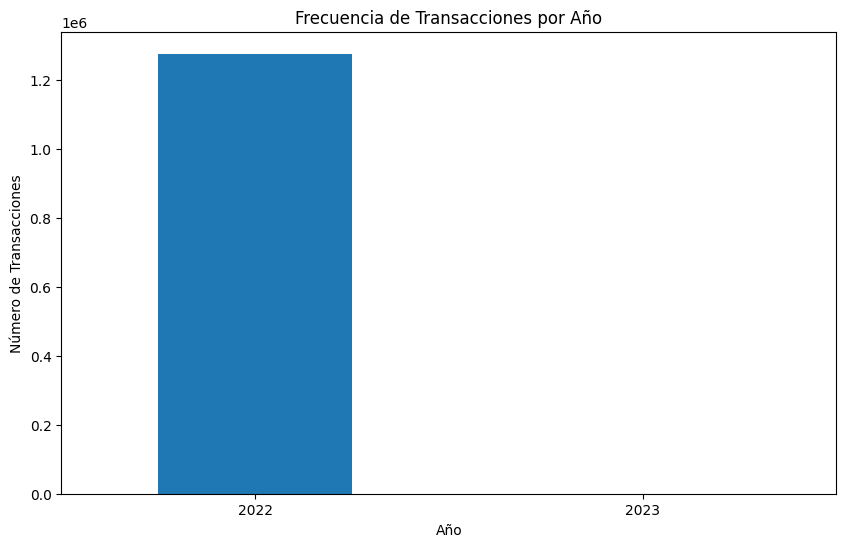

In [12]:
# Graficar frecuencia de transacciones por año
df_balanceado['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de Transacciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=0)
plt.show()

In [13]:
df_balanceado.Year.value_counts()

Year
2022    1275150
2023        176
Name: count, dtype: int64

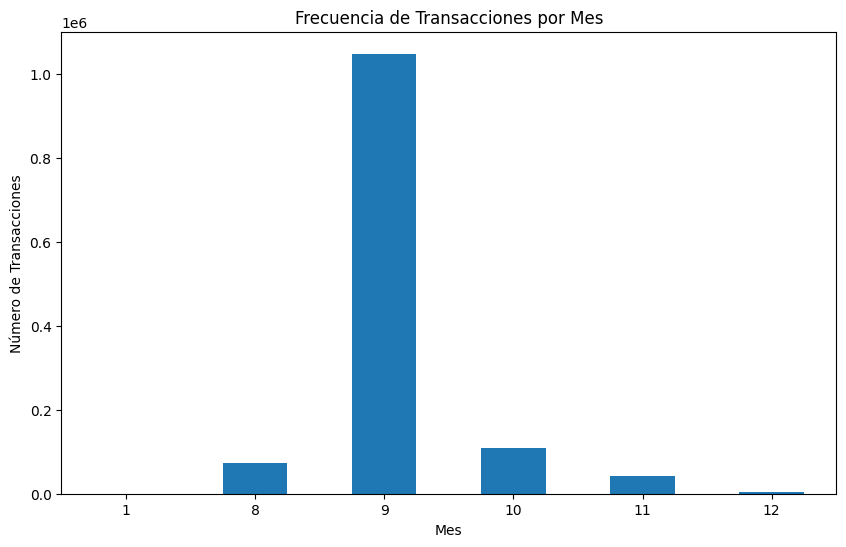

In [14]:
# Graficar frecuencia de transacciones por mes
df_balanceado['Month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de Transacciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=0)
plt.show()

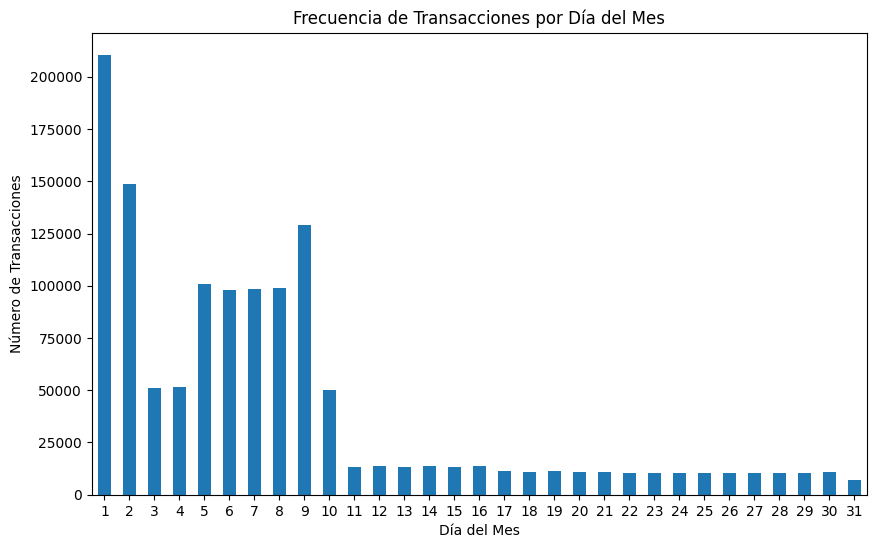

In [15]:
# Graficar frecuencia de transacciones por día del mes
df_balanceado['Day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de Transacciones por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=0)
plt.show()

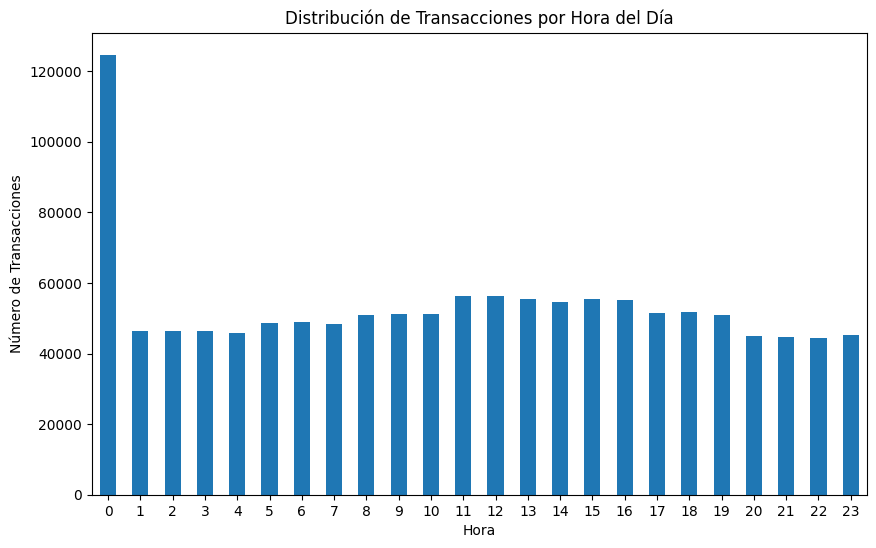

In [16]:
# Graficar distribución de transacciones por hora del día
df_balanceado['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de Transacciones por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=0)
plt.show()

In [17]:
columnas = df_balanceado.columns

# Crear listas para variables numéricas y no numéricas
variables_numericas = [col for col in columnas if df_balanceado[col].dtype in ['int64', 'float64']]
variables_no_numericas = [col for col in columnas if df_balanceado[col].dtype == 'object' and col != 'Timestamp']

print("Variables numéricas:", variables_numericas)
print("Variables no numéricas:", variables_no_numericas)

Variables numéricas: ['From Bank', 'To Bank', 'Amount Received', 'Amount Paid', 'Is Laundering']
Variables no numéricas: ['Account2', 'Account4', 'Receiving Currency', 'Payment Currency', 'Payment Format']


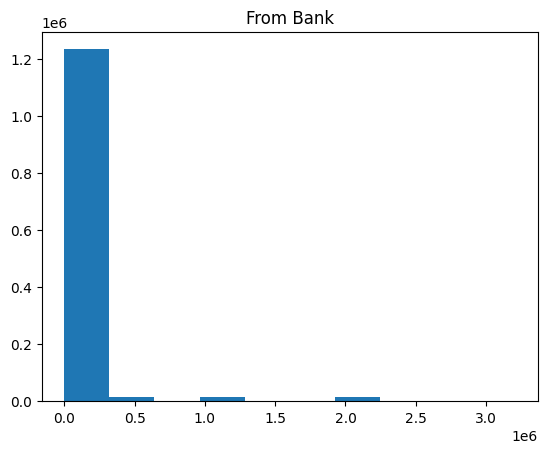

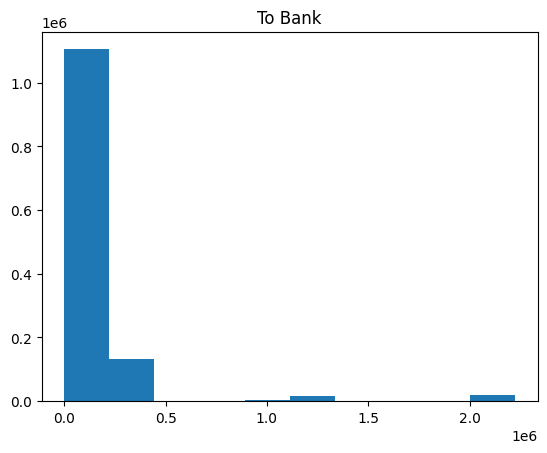

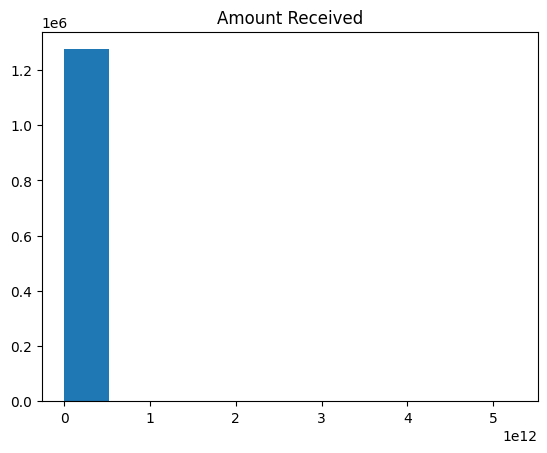

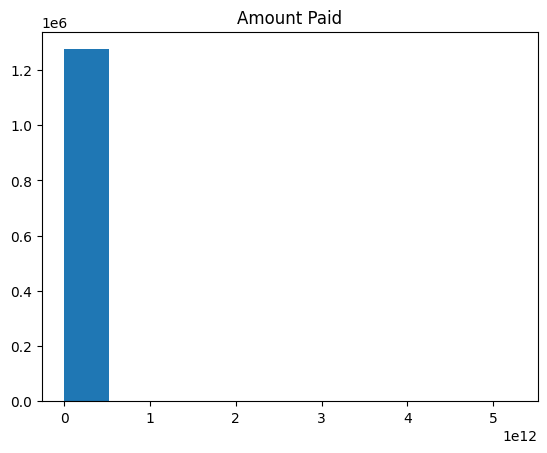

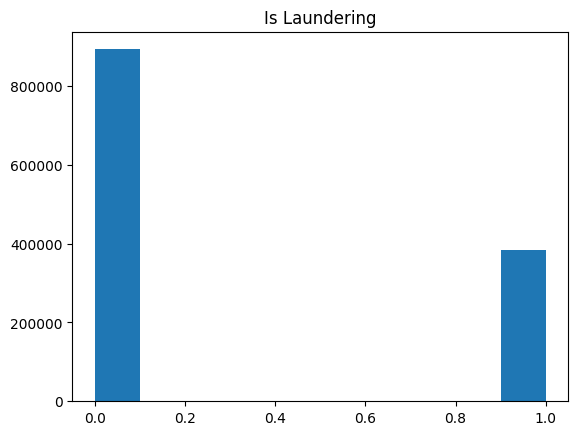

In [18]:
for l in variables_numericas:
    plt.hist(df_balanceado[l])
    plt.title(l)
    plt.show()

In [19]:
variables_no_numericas

['Account2',
 'Account4',
 'Receiving Currency',
 'Payment Currency',
 'Payment Format']

for col in variables_no_numericas:
    df_balanceado[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.show()

In [20]:
df_balanceado.dtypes

From Bank               int64
Account2               object
To Bank                 int64
Account4               object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
Year                    int32
Month                   int32
Day                     int32
Hour                    int32
Minute                  int32
dtype: object

In [21]:
# Ejemplo de codificación para una sola columna categórica
label_encoder = LabelEncoder()

# Codificar 'Account2'
df_balanceado['Account2'] = label_encoder.fit_transform(df_balanceado['Account2'])

# Si tienes múltiples columnas categóricas
for col in ['Account2', 'Receiving Currency', 'Payment Currency', 'Payment Format']:
    df_balanceado[col] = label_encoder.fit_transform(df_balanceado[col].astype(str))

In [22]:
# Verificar los primeros valores en la columna 'Account4'
print(df_balanceado['Account4'].head())

# Verificar los valores únicos para identificar posibles problemas
print(df_balanceado['Account4'].unique())


0    804E62E60
1    80FBE5830
2    80318B6C0
3    80AB27AD0
4    80CB99580
Name: Account4, dtype: object
['804E62E60' '80FBE5830' '80318B6C0' ... '80DCF06B0' '80220A090'
 '81B0DC560']


In [23]:
label_encoder = LabelEncoder()
df_balanceado['Account4'] = label_encoder.fit_transform(df_balanceado['Account4'].astype(str))

In [24]:
# Reemplazar valores no numéricos con NaN si es necesario
df_balanceado['Account4'] = pd.to_numeric(df_balanceado['Account4'], errors='coerce')

# Llenar valores nulos con la media de la columna
df_balanceado['Account4'].fillna(df_balanceado['Account4'].mean(), inplace=True)


C:\Users\Fabio\AppData\Local\Temp\ipykernel_16600\3266681718.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_balanceado['Account4'].fillna(df_balanceado['Account4'].mean(), inplace=True)


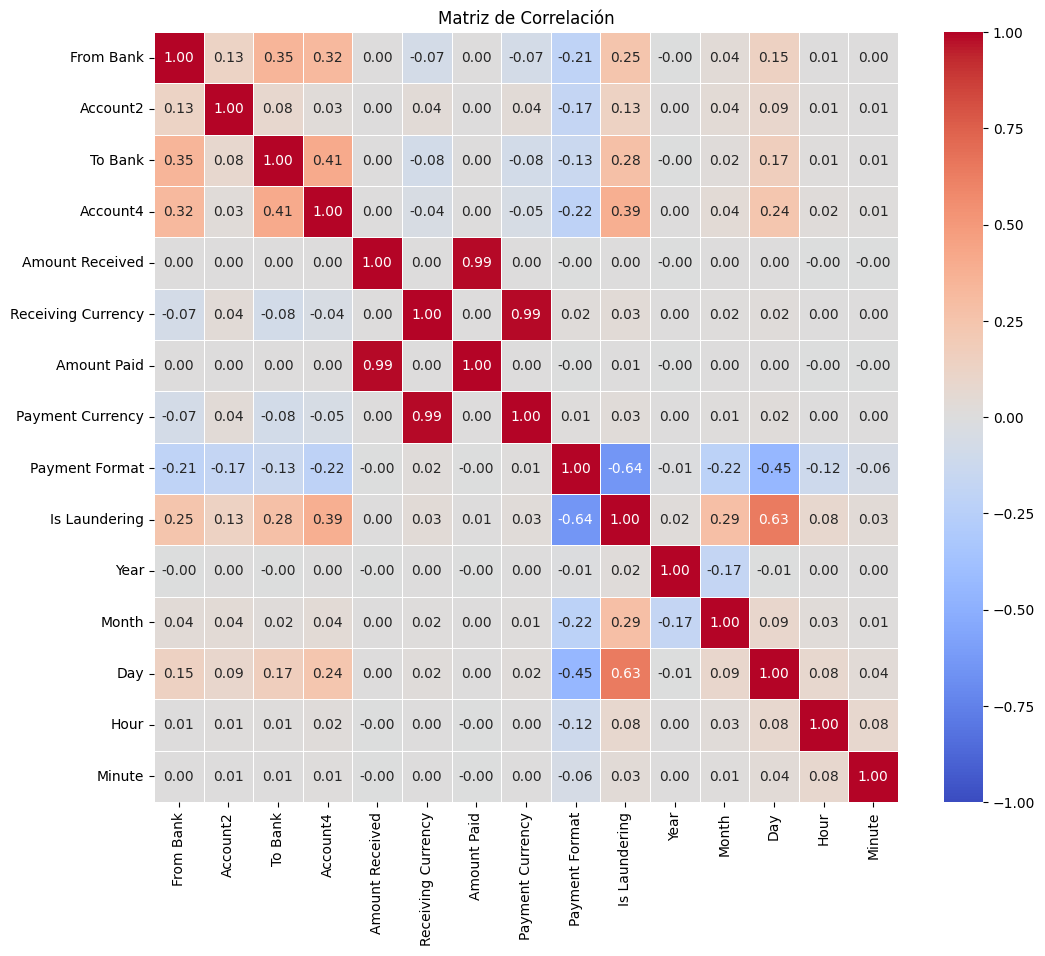

In [25]:
#Analisis de correlación
df_numerico = df_balanceado.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr = df_numerico.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [26]:
#Análisis de colinealidad

# Añadir constante para el cálculo del VIF
df_numerico = add_constant(df_numerico)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_numerico.columns
vif_data["VIF"] = [variance_inflation_factor(df_numerico.values, i) for i in range(df_numerico.shape[1])]

# Mostrar resultados del VIF
print(vif_data)

C:\Users\Fabio\anaconda3\envs\TFM\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Variable        VIF
0                const   0.000000
1            From Bank   1.228521
2             Account2   1.047662
3              To Bank   1.316700
4             Account4   1.384656
5      Amount Received  47.823662
6   Receiving Currency  39.567362
7          Amount Paid  47.823629
8     Payment Currency  39.531762
9       Payment Format   1.788967
10       Is Laundering   2.712220
11                Year   1.039598
12               Month   1.121704
13                 Day   1.715432
14                Hour   1.020850
15              Minute   1.009043


In [27]:
# Separar características y variable objetivo
X = df_balanceado.drop('Is Laundering', axis=1)
y = df_balanceado['Is Laundering']

In [28]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [29]:
# Hacer predicciones y evaluar el modelo
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[178074    524]
 [  2364  74104]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    178598
           1       0.99      0.97      0.98     76468

    accuracy                           0.99    255066
   macro avg       0.99      0.98      0.99    255066
weighted avg       0.99      0.99      0.99    255066



In [31]:
#Cross validation
scoring = make_scorer(f1_score, average='weighted')
cv_scores = cross_val_score(rf_model, X_train, y_train, scoring=scoring, cv=5)

print(cv_scores)
print(np.mean(cv_scores))
print("La desviación estándar es: ", np.std(cv_scores))


KeyboardInterrupt



In [32]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

matriz de confusión
[[178074    524]
 [  2364  74104]]
accuracy
0.9886774403487725
precision
0.9929785067266977
recall
0.969085107495946
f1
0.9808863239265103
AUC
0.9830755720348519


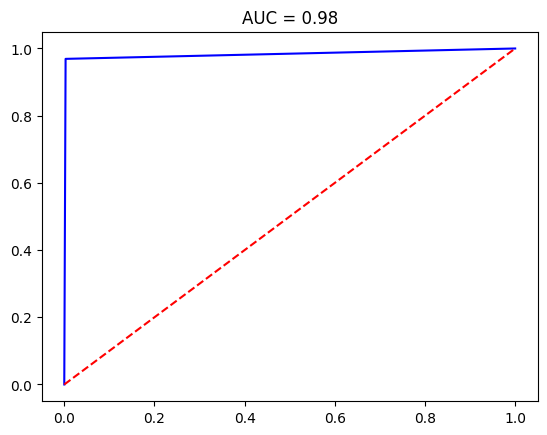

In [33]:
saca_metricas(y_test, y_pred)

In [34]:
rf_model.feature_importances_

array([3.01514855e-02, 2.85653915e-02, 3.35685934e-02, 1.62032307e-01,
       4.24864515e-02, 9.94479789e-03, 3.77806644e-02, 9.75089584e-03,
       2.63284643e-01, 5.87321130e-06, 1.27068797e-01, 2.43400532e-01,
       6.75633169e-03, 5.20323633e-03])

In [ ]:
feat_importances = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
feat_importances

In [35]:
import pickle

pickle.dump(rf_model, open('model.pkl', 'wb'))

In [48]:

label_encoder.fit(df_balanceado['Account4'])

# Guardar el encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']